 ## Importing packages/libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import time
import itertools
import re
import string
import pickle
from string import punctuation
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.svm import LinearSVC, SVC
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier



## Reading the dataset

In [2]:
dataset = pd.read_json("D:/SEMESTER 2/Data Mining/Assignment/News_Category_Dataset_v2.json", lines=True)
dataset.to_csv("news.csv",index = None)


In [3]:
df = pd.read_csv("news.csv")


In [4]:
df

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,NaN,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",NaN,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,NaN,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


In [5]:
df['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [6]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

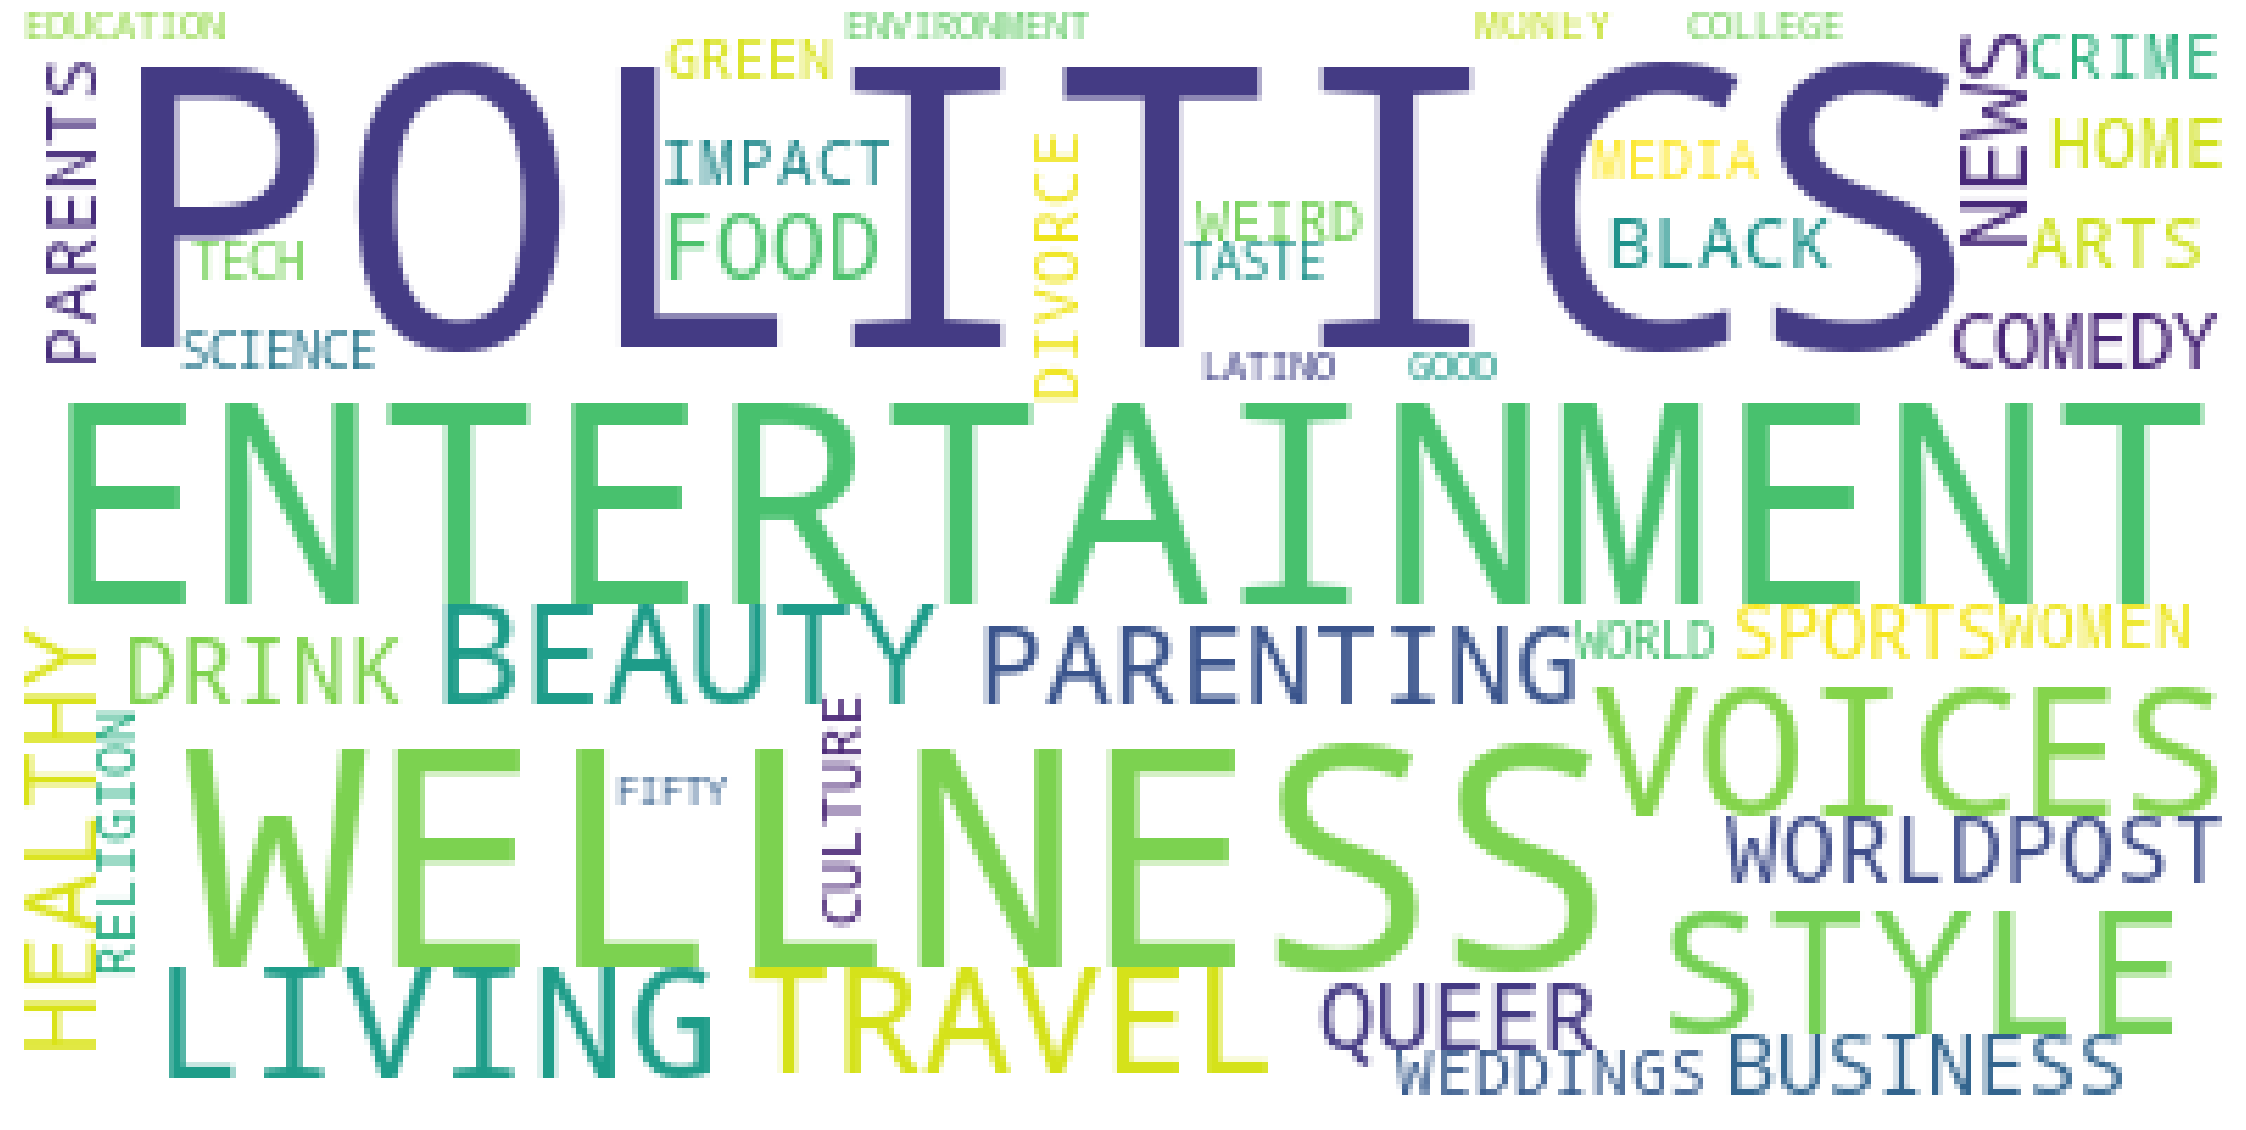

In [7]:
# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud2 = WordCloud(background_color='white', collocations=False).generate(' '.join(df['category']))
#wordcloud = WordCloud(width = 300, height = 200, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(df['category'])
# Plot
plot_cloud(wordcloud2)

## Splitting category into Politics and the rest as OTHER

In [8]:
need = df['category'].value_counts().index[:1]
df['category'] = np.where(df['category'].isin(need), df['category'], 'OTHER')

valCount = df['category'].value_counts()
valCount

OTHER       168114
POLITICS     32739
Name: category, dtype: int64

In [9]:
df.isna().sum()

category                 0
headline                 6
authors              36620
link                     0
short_description    19712
date                     0
dtype: int64

In [10]:
df.category.value_counts()

OTHER       168114
POLITICS     32739
Name: category, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   category           200853 non-null  object
 1   headline           200847 non-null  object
 2   authors            164233 non-null  object
 3   link               200853 non-null  object
 4   short_description  181141 non-null  object
 5   date               200853 non-null  object
dtypes: object(6)
memory usage: 9.2+ MB


In [12]:
df.describe()

,category,headline,authors,link,short_description,date
count,200853,200847,164233,200853,181141,200853
unique,2,199343,27992,200812,178352,2309
top,OTHER,Sunday Roundup,Lee Moran,https://www.huffingtonpost.comhttp://blogs.wsj...,Welcome to the HuffPost Rise Morning Newsbrief...,2012-02-24
freq,168114,90,2423,2,192,100


In [13]:
len(dataset['category'].value_counts())

41

In [14]:
df.head()

,category,headline,authors,link,short_description,date
0,OTHER,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,OTHER,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,OTHER,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,OTHER,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,OTHER,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


## Data Pre Processing

In [15]:
df.drop_duplicates()

,category,headline,authors,link,short_description,date
0,OTHER,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,OTHER,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,OTHER,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,OTHER,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,OTHER,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,OTHER,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,OTHER,Maria Sharapova Stunned By Victoria Azarenka I...,NaN,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,OTHER,"Giants Over Patriots, Jets Over Colts Among M...",NaN,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,OTHER,Aldon Smith Arrested: 49ers Linebacker Busted ...,NaN,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


In [16]:
## Delete Date and Author Column as we don't need them

In [17]:
del df['date']
del df['authors']

In [18]:
df

,category,headline,link,short_description
0,OTHER,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,OTHER,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,OTHER,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,OTHER,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,OTHER,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."
...,...,...,...,...
200848,OTHER,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...
200849,OTHER,Maria Sharapova Stunned By Victoria Azarenka I...,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr..."
200850,OTHER,"Giants Over Patriots, Jets Over Colts Among M...",https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked..."
200851,OTHER,Aldon Smith Arrested: 49ers Linebacker Busted ...,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...


#Consider rows with non empty short description

---



In [19]:
df = df[df['short_description'].notna()]
df=df[df['headline'].notna()]
df

,category,headline,link,short_description
0,OTHER,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,OTHER,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,OTHER,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,OTHER,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,OTHER,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."
...,...,...,...,...
200848,OTHER,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...
200849,OTHER,Maria Sharapova Stunned By Victoria Azarenka I...,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr..."
200850,OTHER,"Giants Over Patriots, Jets Over Colts Among M...",https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked..."
200851,OTHER,Aldon Smith Arrested: 49ers Linebacker Busted ...,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...


#Drop duplicates

In [20]:
df['text'] = df['headline'] + df['short_description']

In [21]:
df.head()

,category,headline,link,short_description,text
0,OTHER,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...
1,OTHER,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...
2,OTHER,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...
3,OTHER,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,OTHER,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...


In [22]:
del df['headline']
del df['short_description']
del df['link']


In [23]:
df.head()

,category,text
0,OTHER,There Were 2 Mass Shootings In Texas Last Week...
1,OTHER,Will Smith Joins Diplo And Nicky Jam For The 2...
2,OTHER,Hugh Grant Marries For The First Time At Age 5...
3,OTHER,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,OTHER,Julianna Margulies Uses Donald Trump Poop Bags...


In [24]:
df=df.drop_duplicates()
df

,category,text
0,OTHER,There Were 2 Mass Shootings In Texas Last Week...
1,OTHER,Will Smith Joins Diplo And Nicky Jam For The 2...
2,OTHER,Hugh Grant Marries For The First Time At Age 5...
3,OTHER,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,OTHER,Julianna Margulies Uses Donald Trump Poop Bags...
...,...,...
200848,OTHER,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
200849,OTHER,Maria Sharapova Stunned By Victoria Azarenka I...
200850,OTHER,"Giants Over Patriots, Jets Over Colts Among M..."
200851,OTHER,Aldon Smith Arrested: 49ers Linebacker Busted ...


#Cleaning

In [25]:
df.count()
df.isnull().values.any()

False

In [26]:
df['text'].apply(lambda x: len((x).split(' '))).sum()

5508798

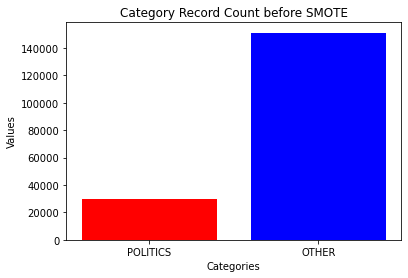

In [27]:
df1=df.category.value_counts()
dff = pd.DataFrame(df.groupby(['category']).size().sort_values(ascending=True).rename('counts').reset_index())
dff
plt.bar(dff['category'],dff['counts'],color=[ 'red', 'blue'])
plt.xlabel('Categories')
plt.ylabel("Values")
plt.title('Category Record Count before SMOTE')
plt.show()

OTHER       151191
POLITICS     29564
Name: category, dtype: int64


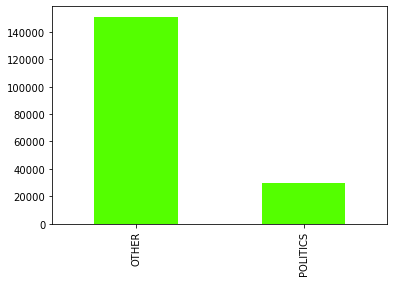

In [28]:
print(df.category.value_counts())
df.category.value_counts().plot(kind = 'bar', cmap = "prism_r")

#Cleaning the data

In [29]:
#Eliminating punctuations
punctuations = string.punctuation 
punctuations_pattern = r"[{}]".format(punctuations)
df['text'] = df.apply(lambda row: ' '.join(re.sub(punctuations_pattern,"",row["text"]).split()),axis=1)


<ipython-input-29-f6b9748bd5e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df.apply(lambda row: ' '.join(re.sub(punctuations_pattern,"",row["text"]).split()),axis=1)


In [30]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['text_tokenized'] = df['text'].apply(lambda x: tokenization(x.lower()))
df.head()

<ipython-input-30-48ca50919ed7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_tokenized'] = df['text'].apply(lambda x: tokenization(x.lower()))


,category,text,text_tokenized
0,OTHER,There Were 2 Mass Shootings In Texas Last Week...,"[there, were, 2, mass, shootings, in, texas, l..."
1,OTHER,Will Smith Joins Diplo And Nicky Jam For The 2...,"[will, smith, joins, diplo, and, nicky, jam, f..."
2,OTHER,Hugh Grant Marries For The First Time At Age 5...,"[hugh, grant, marries, for, the, first, time, ..."
3,OTHER,Jim Carrey Blasts Castrato Adam Schiff And Dem...,"[jim, carrey, blasts, castrato, adam, schiff, ..."
4,OTHER,Julianna Margulies Uses Donald Trump Poop Bags...,"[julianna, margulies, uses, donald, trump, poo..."


In [31]:
import nltk

In [32]:
sent_tokens = df.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1)

sent_tokens

0         [There Were 2 Mass Shootings In Texas Last Wee...
1         [Will Smith Joins Diplo And Nicky Jam For The ...
2         [Hugh Grant Marries For The First Time At Age ...
3         [Jim Carrey Blasts Castrato Adam Schiff And De...
4         [Julianna Margulies Uses Donald Trump Poop Bag...
                                ...                        
200848    [RIM CEO Thorsten Heins Significant Plans For ...
200849    [Maria Sharapova Stunned By Victoria Azarenka ...
200850    [Giants Over Patriots Jets Over Colts Among Mo...
200851    [Aldon Smith Arrested 49ers Linebacker Busted ...
200852    [Dwight Howard Rips Teammates After Magic Loss...
Length: 180755, dtype: object

In [33]:
document = list(itertools.chain.from_iterable(list(sent_tokens)))
document

['There Were 2 Mass Shootings In Texas Last Week But Only 1 On TVShe left her husband He killed their children Just another day in America',
 'Will Smith Joins Diplo And Nicky Jam For The 2018 World Cups Official SongOf course it has a song',
 'Hugh Grant Marries For The First Time At Age 57The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony',
 'Jim Carrey Blasts Castrato Adam Schiff And Democrats In New ArtworkThe actor gives Dems an asskicking for not fighting hard enough against Donald Trump',
 'Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her DogThe Dietland actress said using the bags is a really cathartic therapeutic moment',
 'Morgan Freeman Devastated That Sexual Harassment Claims Could Undermine LegacyIt is not right to equate horrific incidents of sexual assault with misplaced compliments or humor he said in a statement',
 'Donald Trump Is Lovin New McDonalds Jingle In Tonight Show BitIts catchy all right',
 'What To Watch

In [34]:
import gensim
stopword = nltk.corpus.stopwords.words('english')

def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    tokens = re.split('\W+', text)    # tokenization
    stop_free = " ".join([i for i in text.lower().split() if i not in stopword]) #remove stopwords
    lemmatized = ''.join(lemmatizer.lemmatize(word) for word in stop_free) 
    bigram_mod = bigrams(lemmatized)
    bigram = ''.join(bigram_mod[lemmatized])
    return bigram

def bigrams(words, bi_min=15, tri_min=10):
        bigram = gensim.models.Phrases(words, min_count = bi_min)
        bigram_mod = gensim.models.phrases.Phraser(bigram)
        return bigram_mod


   

C:\Users\Varsha Narayan\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [35]:
#data_clean = [clean(doc).split() for doc in doc_complete]

lemmatizer = WordNetLemmatizer()

data_clean = [clean_text(doc).split() for doc in document]

In [36]:
len(data_clean)

180755

In [37]:
#Forming a list of terms(vocab)
import itertools
nltk.download('averaged_perceptron_tagger')


# #Forming a list of terms(vocab)
# import itertools
# from nltk import word_tokenize, pos_tag, pos_tag_sents
# nltk.download('averaged_perceptron_tagger')
# texts = df['text']
# for sentence in df['text']:
#     words=[]
#     for term in sentence:
#       pos = pos_tag(term)
words = list(itertools.chain.from_iterable(data_clean))
words



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Varsha Narayan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['2',
 'mass',
 'shootings',
 'texas',
 'last',
 'week',
 '1',
 'tvshe',
 'left',
 'husband',
 'killed',
 'children',
 'another',
 'day',
 'america',
 'smith',
 'joins',
 'diplo',
 'nicky',
 'jam',
 '2018',
 'world',
 'cups',
 'official',
 'songof',
 'course',
 'song',
 'hugh',
 'grant',
 'marries',
 'first',
 'time',
 'age',
 '57the',
 'actor',
 'longtime',
 'girlfriend',
 'anna',
 'eberstein',
 'tied',
 'knot',
 'civil',
 'ceremony',
 'jim',
 'carrey',
 'blasts',
 'castrato',
 'adam',
 'schiff',
 'democrats',
 'new',
 'artworkthe',
 'actor',
 'gives',
 'dems',
 'asskicking',
 'fighting',
 'hard',
 'enough',
 'donald',
 'trump',
 'julianna',
 'margulies',
 'uses',
 'donald',
 'trump',
 'poop',
 'bags',
 'pick',
 'dogthe',
 'dietland',
 'actress',
 'said',
 'using',
 'bags',
 'really',
 'cathartic',
 'therapeutic',
 'moment',
 'morgan',
 'freeman',
 'devastated',
 'sexual',
 'harassment',
 'claims',
 'could',
 'undermine',
 'legacyit',
 'right',
 'equate',
 'horrific',
 'incidents',
 '

In [38]:
pos = nltk.pos_tag(words)

In [39]:
import csv

with open('pos.csv','w',encoding='utf-8') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['word','tag'])
    for row in pos:
        csv_out.writerow(row)

In [40]:
POS = pd.read_csv('pos.csv')

In [41]:
len(POS)

3350557

In [42]:
POS

,word,tag
0,2,CD
1,mass,NN
2,shootings,NNS
3,texas,VBD
4,last,JJ
...,...,...
3350552,23,CD
3350553,turnovers,NNS
3350554,en,IN
3350555,route,NN


In [43]:
pos = dict(pos)

In [44]:
data_final=[]
sent = []
for sentence in data_clean:
    words=[]
    for term in sentence:
        #sent = sentence
        if pos[term] not in ['CC','CD','DT','EX','IN','JJS','MD','PRP','PRP$','RBS','RP','TO','UH','WDT','WP','WRB']:
            words.append(term)
    data_final.append(words)


In [45]:
data_final

[['mass',
  'shootings',
  'texas',
  'last',
  'week',
  'tvshe',
  'left',
  'husband',
  'killed',
  'children',
  'day',
  'america'],
 ['smith',
  'joins',
  'diplo',
  'nicky',
  'jam',
  'world',
  'cups',
  'official',
  'songof',
  'course',
  'song'],
 ['hugh',
  'grant',
  'marries',
  'first',
  'time',
  'age',
  'actor',
  'longtime',
  'girlfriend',
  'eberstein',
  'tied',
  'knot',
  'civil',
  'ceremony'],
 ['jim',
  'carrey',
  'blasts',
  'castrato',
  'adam',
  'schiff',
  'democrats',
  'new',
  'artworkthe',
  'actor',
  'gives',
  'dems',
  'asskicking',
  'fighting',
  'hard',
  'enough',
  'donald',
  'trump'],
 ['julianna',
  'margulies',
  'uses',
  'donald',
  'trump',
  'poop',
  'bags',
  'pick',
  'dogthe',
  'dietland',
  'actress',
  'said',
  'using',
  'bags',
  'really',
  'cathartic',
  'therapeutic',
  'moment'],
 ['morgan',
  'freeman',
  'devastated',
  'sexual',
  'harassment',
  'claims',
  'undermine',
  'legacyit',
  'right',
  'equate',
  '

In [46]:
corpus = []
for doc in data_final:
    document = ' '.join(doc)
    corpus.append(document)
    document=[]

In [47]:
corpus

['mass shootings texas last week tvshe left husband killed children day america',
 'smith joins diplo nicky jam world cups official songof course song',
 'hugh grant marries first time age actor longtime girlfriend eberstein tied knot civil ceremony',
 'jim carrey blasts castrato adam schiff democrats new artworkthe actor gives dems asskicking fighting hard enough donald trump',
 'julianna margulies uses donald trump poop bags pick dogthe dietland actress said using bags really cathartic therapeutic moment',
 'morgan freeman devastated sexual harassment claims undermine legacyit right equate horrific incidents sexual assault misplaced compliments humor said statement',
 'donald trump lovin new mcdonalds jingle tonight show bitits catchy right',
 'watch amazon prime that’s new weektheres great miniseries joining week',
 'myers reveals hed fourth austin powers filmmyers kids pushing new powers film anyone',
 'watch hulu that’s new weekyoure getting recent academy awardwinning movie',
 'j

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.shape)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [49]:
X.shape

(180755, 219434)

In [50]:
df.head()

,category,text,text_tokenized
0,OTHER,There Were 2 Mass Shootings In Texas Last Week...,"[there, were, 2, mass, shootings, in, texas, l..."
1,OTHER,Will Smith Joins Diplo And Nicky Jam For The 2...,"[will, smith, joins, diplo, and, nicky, jam, f..."
2,OTHER,Hugh Grant Marries For The First Time At Age 5...,"[hugh, grant, marries, for, the, first, time, ..."
3,OTHER,Jim Carrey Blasts Castrato Adam Schiff And Dem...,"[jim, carrey, blasts, castrato, adam, schiff, ..."
4,OTHER,Julianna Margulies Uses Donald Trump Poop Bags...,"[julianna, margulies, uses, donald, trump, poo..."


In [51]:
valCount = df['category'].value_counts()

In [52]:
valCount

OTHER       151191
POLITICS     29564
Name: category, dtype: int64

In [53]:
df

,category,text,text_tokenized
0,OTHER,There Were 2 Mass Shootings In Texas Last Week...,"[there, were, 2, mass, shootings, in, texas, l..."
1,OTHER,Will Smith Joins Diplo And Nicky Jam For The 2...,"[will, smith, joins, diplo, and, nicky, jam, f..."
2,OTHER,Hugh Grant Marries For The First Time At Age 5...,"[hugh, grant, marries, for, the, first, time, ..."
3,OTHER,Jim Carrey Blasts Castrato Adam Schiff And Dem...,"[jim, carrey, blasts, castrato, adam, schiff, ..."
4,OTHER,Julianna Margulies Uses Donald Trump Poop Bags...,"[julianna, margulies, uses, donald, trump, poo..."
...,...,...,...
200848,OTHER,RIM CEO Thorsten Heins Significant Plans For B...,"[rim, ceo, thorsten, heins, significant, plans..."
200849,OTHER,Maria Sharapova Stunned By Victoria Azarenka I...,"[maria, sharapova, stunned, by, victoria, azar..."
200850,OTHER,Giants Over Patriots Jets Over Colts Among Mos...,"[giants, over, patriots, jets, over, colts, am..."
200851,OTHER,Aldon Smith Arrested 49ers Linebacker Busted F...,"[aldon, smith, arrested, 49ers, linebacker, bu..."


In [54]:
df["category"] = df["category"].astype('category')

df["label_cat"] = df["category"].cat.codes
df


<ipython-input-54-cbaf2dcdab90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["category"] = df["category"].astype('category')
<ipython-input-54-cbaf2dcdab90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label_cat"] = df["category"].cat.codes


,category,text,text_tokenized,label_cat
0,OTHER,There Were 2 Mass Shootings In Texas Last Week...,"[there, were, 2, mass, shootings, in, texas, l...",0
1,OTHER,Will Smith Joins Diplo And Nicky Jam For The 2...,"[will, smith, joins, diplo, and, nicky, jam, f...",0
2,OTHER,Hugh Grant Marries For The First Time At Age 5...,"[hugh, grant, marries, for, the, first, time, ...",0
3,OTHER,Jim Carrey Blasts Castrato Adam Schiff And Dem...,"[jim, carrey, blasts, castrato, adam, schiff, ...",0
4,OTHER,Julianna Margulies Uses Donald Trump Poop Bags...,"[julianna, margulies, uses, donald, trump, poo...",0
...,...,...,...,...
200848,OTHER,RIM CEO Thorsten Heins Significant Plans For B...,"[rim, ceo, thorsten, heins, significant, plans...",0
200849,OTHER,Maria Sharapova Stunned By Victoria Azarenka I...,"[maria, sharapova, stunned, by, victoria, azar...",0
200850,OTHER,Giants Over Patriots Jets Over Colts Among Mos...,"[giants, over, patriots, jets, over, colts, am...",0
200851,OTHER,Aldon Smith Arrested 49ers Linebacker Busted F...,"[aldon, smith, arrested, 49ers, linebacker, bu...",0


In [55]:
Y = df["label_cat"]
Y=Y.to_frame()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (126528, 219434)
Number transactions y_train dataset:  (126528, 1)
Number transactions X_test dataset:  (54227, 219434)
Number transactions y_test dataset:  (54227, 1)


In [57]:
df1=y_train.label_cat.value_counts()
#dff = pd.DataFrame(y_train.groupby(['label_cat']).size().sort_values(ascending=True).rename('counts').reset_index())
#dff
df1

0    105752
1     20776
Name: label_cat, dtype: int64

In [58]:
y_train.label_cat.value_counts()

0    105752
1     20776
Name: label_cat, dtype: int64

C:\Users\Varsha Narayan\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:218: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(
C:\Users\Varsha Narayan\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\style.py:27: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


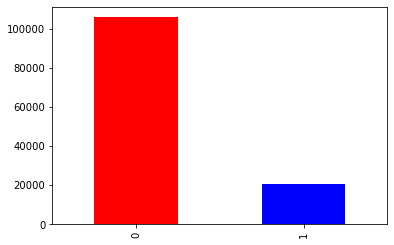

In [59]:
y_train.label_cat.value_counts().plot(kind = 'bar', cmap = "prism_r" , color=[ 'red', 'blue'])

#SMOTE


In [60]:

print("Before OverSampling, counts of label '0': {}".format(sum(y_train.label_cat==0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train.label_cat==1)))

smote = SMOTE(random_state=777,k_neighbors=5)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '0': {}".format(sum(y_train_res.label_cat==0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res.label_cat==1)))


Before OverSampling, counts of label '0': 105752
Before OverSampling, counts of label '1': 20776 

After OverSampling, the shape of train_X: (211504, 219434)
After OverSampling, the shape of train_y: (211504, 1) 

After OverSampling, counts of label '0': 105752
After OverSampling, counts of label '1': 105752


In [61]:
#labels = ("POLITICS", "OTHER")
# plt.xticks(labels)
# y_train_res.label_cat.value_counts().plot(kind = 'bar', cmap = "prism_r")# 

# fig = plt.figure()
# plt.bar(courses, values, color ='maroon',
#         width = 0.4)
# plt.xlabel("Courses offered")
# plt.ylabel("No. of students enrolled")
# plt.title("Students enrolled in different courses")
# plt.show()

In [62]:
# xaxisLabels = ("POLITICS", "OTHER")
# fig, ax = plt.subplots()

In [63]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

 # Multinomial NB

In [85]:
parameters = {
    
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

from sklearn.model_selection import train_test_split, GridSearchCV
text_clf = Pipeline([
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
clf = GridSearchCV(text_clf, parameters, cv=10, scoring="accuracy")
clf.fit(X_train_res, y_train_res.values.ravel())

print(classification_report(y_test, clf.predict(X_test), digits=4))

clf.best_score_

clf.best_params_

              precision    recall  f1-score   support

           0     0.9444    0.9180    0.9310     45439
           1     0.6297    0.7208    0.6721      8788

    accuracy                         0.8861     54227
   macro avg     0.7871    0.8194    0.8016     54227
weighted avg     0.8934    0.8861    0.8891     54227



{'clf__alpha': 0.01, 'tfidf__norm': 'l2', 'tfidf__use_idf': True}

After Tuning the hyper parameters

In [86]:
modelNB = make_pipeline(TfidfTransformer(), MultinomialNB(alpha=0.01))
modelNB

Pipeline(steps=[('tfidftransformer', TfidfTransformer()),
                ('multinomialnb', MultinomialNB(alpha=0.01))])

In [87]:
modelNB.fit(X_train_res,y_train_res.values.ravel())
labels = modelNB.predict(X_test)

In [88]:
NBaccuracy = accuracy_score(y_test, labels)
print(classification_report(y_test,labels))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     45439
           1       0.63      0.72      0.67      8788

    accuracy                           0.89     54227
   macro avg       0.79      0.82      0.80     54227
weighted avg       0.89      0.89      0.89     54227



After running k-fold cross validation with cv = 10 for Naive Bayes Model, we got 95%  confidence interval

In [83]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(modelNB,  X_train_res, y_train_res.values.ravel(), cv=10)))

0.9545209820235516


#Confusion Matrix

Categories
[[41714  3725]
 [ 2454  6334]]


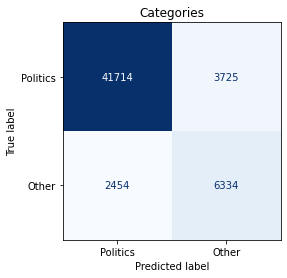

In [84]:
class_names=['Politics','Other']
disp = plot_confusion_matrix(modelNB, X_test, y_test,
                                 display_labels=class_names,
                                 colorbar=False,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                 values_format='d'
                                 
                                )
disp.ax_.set_title('Categories')
print('Categories')
print(disp.confusion_matrix)
plt.show()

## Logistic Regression

After Hyper parameter tuning

In [91]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(solver = 'liblinear')
modelLR.fit(X_train_res, y_train_res)
y_pred = modelLR.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\Varsha Narayan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.96      0.94      0.95     45439
           1       0.72      0.81      0.76      8788

    accuracy                           0.92     54227
   macro avg       0.84      0.88      0.86     54227
weighted avg       0.92      0.92      0.92     54227



After running k-fold cross validation with cv = 10 for Logistic Regression Model, we got 94% confidence interval

In [92]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(modelLR,  X_train_res, y_train_res.values.ravel(), cv=10)))

0.9408571164472772


Confusion Matrix

Categories
[[42593  2846]
 [ 1632  7156]]


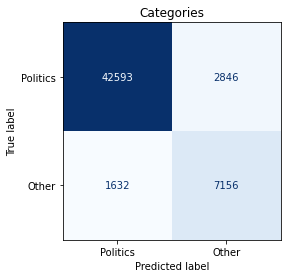

In [93]:
class_names=['Politics','Other']
disp = plot_confusion_matrix(modelLR, X_test, y_test,
                                 display_labels=class_names,
                                 colorbar=False,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                 values_format='d'
                                 
                                )
disp.ax_.set_title('Categories')
print('Categories')
print(disp.confusion_matrix)
plt.show()

 ## Random Forest

In [94]:
modelRF = RandomForestClassifier(random_state = 1)
modelRF.fit(X_train_res, y_train_res.values.ravel())
y_pred = modelRF.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     45439
           1       0.76      0.70      0.73      8788

    accuracy                           0.92     54227
   macro avg       0.85      0.83      0.84     54227
weighted avg       0.91      0.92      0.92     54227



confusion matrix

Categories
[[43515  1924]
 [ 2605  6183]]


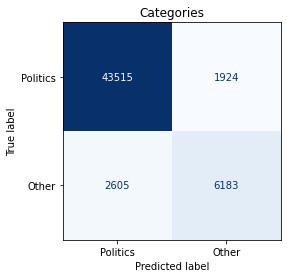

In [95]:
class_names=['Politics','Other']
disp = plot_confusion_matrix(modelRF, X_test, y_test,
                                 display_labels=class_names,
                                 colorbar=False,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                 values_format='d'
                                 
                                )
disp.ax_.set_title('Categories')
print('Categories')
print(disp.confusion_matrix)
plt.show()

After running k-fold cross validation with cv = 10 for Random Forest Model, we got confidence interval

In [97]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(modelRF,  X_train_res, y_train_res.values.ravel(),scoring='f1_macro', cv=10)))

KeyboardInterrupt: 

 ## SVM

In [ ]:
After hyper paramter tuning

In [ ]:
modelSVM = svm.SVC(kernel='linear', C=1)

In [ ]:
modelSVM.fit(X_train_res,y_train_res.values.ravel())

In [ ]:
svm_pred = modelSVM.predict(X_test)

In [ ]:
print(classification_report(y_test,svm_pred))

In [ ]:
filename = 'PoliticalSVM2_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV
#from scipy.stats import reciprocal, uniform
#param_distributions = {"C": uniform(1, 10)}
#Adding all values of hyperparameters in a list from which the values of hyperparameter will randomly inserted as hyperparameter

#confusion matrix

In [ ]:
class_names=['Politics','Other']
disp = plot_confusion_matrix(modelSVM, X_test, y_test,
                                 display_labels=class_names,
                                 colorbar=False,
                                 cmap=plt.cm.Blues,
                                 normalize=None,
                                 values_format='d'
                                 
                                )
disp.ax_.set_title('Categories')
print('Categories')
print(disp.confusion_matrix)
plt.show()

After running k-fold cross validation with cv = 10 for SVM Model, we got confidence interval

In [ ]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(modelSVM,  X_train_res, y_train_res.values.ravel(), cv=10)))